In [2]:
# Common
import os
import keras 
import numpy as np
import tensorflow as tf

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz
from tensorflow.keras.utils import plot_model

2023-08-16 14:13:30.903726: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-16 14:13:30.944025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 14:13:31.351318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Data - INFO

In [3]:
root_path = './dataset/'

class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 11


In [4]:
class_dis = [len(os.listdir(root_path + "/" + name)) for name in class_names]
class_dis

[698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

Data - Visualization

In [5]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

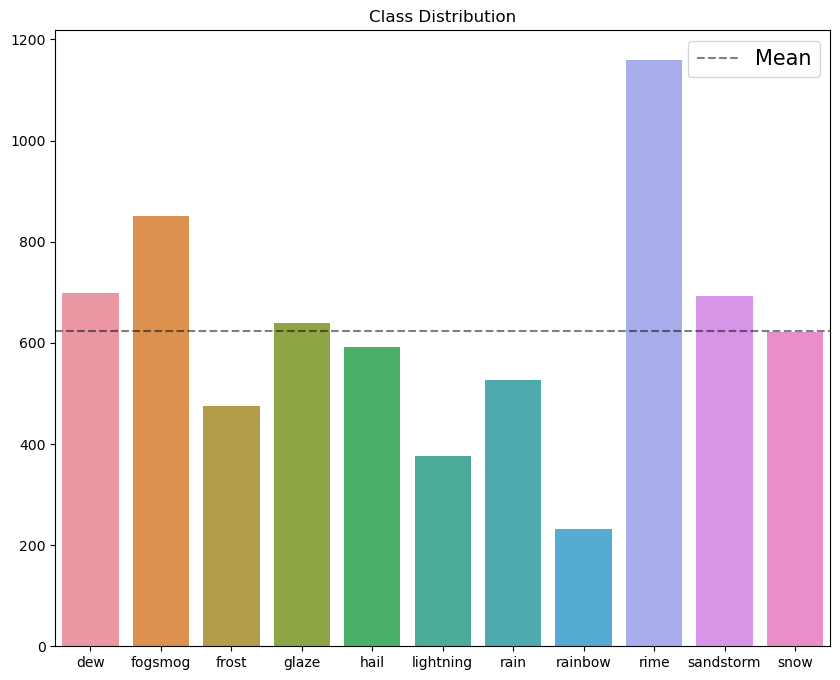

In [6]:
plt.figure(figsize=(10,8))
sns.barplot(
    x=class_names, 
    y=class_dis
)
plt.axhline(np.mean(class_dis), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Class Distribution")
plt.legend(fontsize=15)
plt.show()

Data - Data Aug (?) and Load Data

In [7]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)


Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


Data - Show 20 random images from data

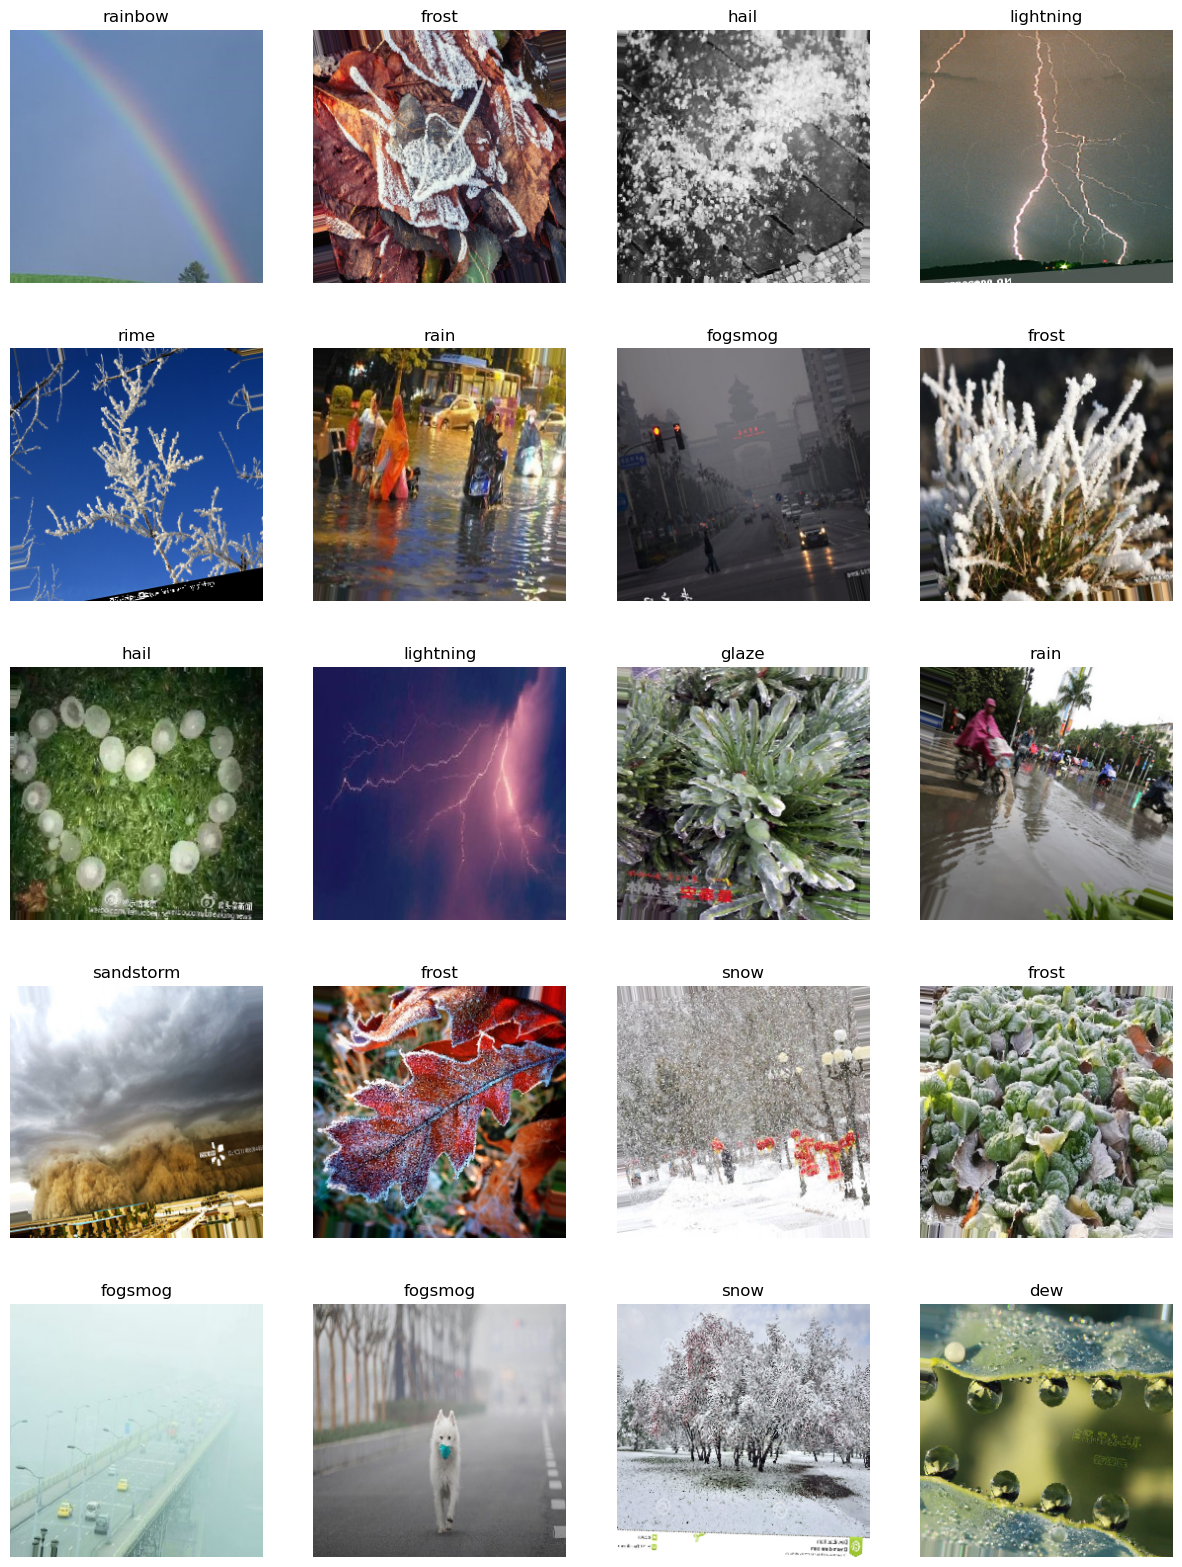

In [8]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

Using ResNet152V2 model

In [9]:
name = 'resnet'

# Tranfer learning model
base_model = ResNet152V2(include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# Model
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

2023-08-16 14:14:16.189694: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-08-16 14:14:16.189723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: bada-Alienware-m15-R7
2023-08-16 14:14:16.189726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: bada-Alienware-m15-R7
2023-08-16 14:14:16.189832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.86.10
2023-08-16 14:14:16.189843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.86.10
2023-08-16 14:14:16.189845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.86.10


In [9]:
model.fit(train_ds, epochs=10, callbacks=callbacks, validation_data=valid_ds)

Epoch 1/10
 14/172 [=>............................] - ETA: 3:58 - loss: 2.1378 - accuracy: 0.3058

KeyboardInterrupt: 

In [10]:
model = load_model('./resnet.h5')


In [11]:
model.evaluate(valid_ds)

 1/43 [..............................] - ETA: 2:24 - loss: 0.8309 - accuracy: 0.8438

KeyboardInterrupt: 

In [12]:
images, labels = valid_ds[0]

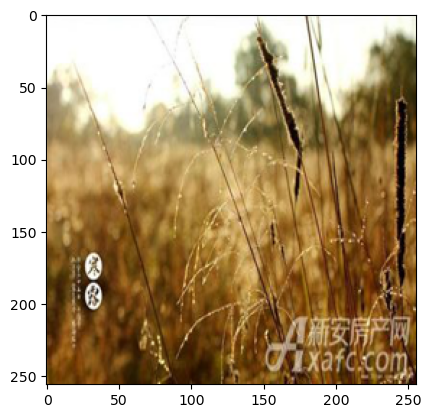

In [84]:
from PIL import Image

dew = './dataset/dew/2272.jpg'
fogsmog = './dataset/fogsmog/4080.jpg'
frost = './dataset/frost/3630.jpg'
glaze = './dataset/glaze/6092.jpg'
hail = './dataset/hail/0138.jpg'
lightning = './dataset/lightning/2102.jpg'
rain = './dataset/rain/13.jpg'
rainbow = './dataset/rainbow/0599.jpg'
rime = './dataset/rime/5387.jpg'
sandstorm = './dataset/sandstorm/3393.jpg'
snow = './dataset/snow/0838.jpg'

image = Image.open(dew)
image = image.resize([256, 256])
plt.figure()
plt.imshow(image)

np_img = np.expand_dims(image, axis=0)

In [85]:
np.shape(image)

(256, 256, 3)

In [86]:
img_scaled = np_img / 255.0
result = model.predict(img_scaled)
result

1/1 [==============================] - 0s 80ms/step


array([[6.28149867e-01, 1.16878422e-03, 2.49309123e-01, 7.76923820e-02,
        6.80752145e-03, 1.21040015e-04, 2.20588921e-03, 6.33661402e-04,
        8.68471761e-05, 3.26457322e-02, 1.17909757e-03]], dtype=float32)

In [87]:
sorted_labels = ['dew', 'fog or smog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']

idx = np.argmax(result)

print("The weather is " + sorted_labels[idx] + " (index = " + str(idx) + ")")

The weather is dew (index = 0)
